In [1]:
# Created by Adam Simcoe
# Last Updated November 15th, 2024

In [3]:
# Library Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler, PolynomialFeatures

In [4]:
# Load our training and testing datasets into variables
train_data = pd.read_csv('train.csv', keep_default_na=False)
test_data = pd.read_csv('test.csv', keep_default_na=False)

In [7]:
# Print out all columns for the train data
print("Train columns:", train_data.columns)

Train columns: Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCon

In [9]:
# print out all columns for the test data
print("Test columns:", test_data.columns)

Test columns: Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond

In [11]:
# Print out first 10 rows of train data
train_data.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65,8450,Pave,NA,Reg,Lvl,AllPub,...,0,NA,NA,NA,0,2,2008,WD,Normal,208500
1,2,20,RL,80,9600,Pave,NA,Reg,Lvl,AllPub,...,0,NA,NA,NA,0,5,2007,WD,Normal,181500
2,3,60,RL,68,11250,Pave,NA,IR1,Lvl,AllPub,...,0,NA,NA,NA,0,9,2008,WD,Normal,223500
3,4,70,RL,60,9550,Pave,NA,IR1,Lvl,AllPub,...,0,NA,NA,NA,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84,14260,Pave,NA,IR1,Lvl,AllPub,...,0,NA,NA,NA,0,12,2008,WD,Normal,250000
5,6,50,RL,85,14115,Pave,NA,IR1,Lvl,AllPub,...,0,NA,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75,10084,Pave,NA,Reg,Lvl,AllPub,...,0,NA,NA,NA,0,8,2007,WD,Normal,307000
7,8,60,RL,NA,10382,Pave,NA,IR1,Lvl,AllPub,...,0,NA,NA,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51,6120,Pave,NA,Reg,Lvl,AllPub,...,0,NA,NA,NA,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50,7420,Pave,NA,Reg,Lvl,AllPub,...,0,NA,NA,NA,0,1,2008,WD,Normal,118000


In [13]:
# print out first 10 rows of test data
test_data.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80,11622,Pave,NA,Reg,Lvl,AllPub,...,120,0,NA,MnPrv,NA,0,6,2010,WD,Normal
1,1462,20,RL,81,14267,Pave,NA,IR1,Lvl,AllPub,...,0,0,NA,NA,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74,13830,Pave,NA,IR1,Lvl,AllPub,...,0,0,NA,MnPrv,NA,0,3,2010,WD,Normal
3,1464,60,RL,78,9978,Pave,NA,IR1,Lvl,AllPub,...,0,0,NA,NA,NA,0,6,2010,WD,Normal
4,1465,120,RL,43,5005,Pave,NA,IR1,HLS,AllPub,...,144,0,NA,NA,NA,0,1,2010,WD,Normal
5,1466,60,RL,75,10000,Pave,NA,IR1,Lvl,AllPub,...,0,0,NA,NA,NA,0,4,2010,WD,Normal
6,1467,20,RL,NA,7980,Pave,NA,IR1,Lvl,AllPub,...,0,0,NA,GdPrv,Shed,500,3,2010,WD,Normal
7,1468,60,RL,63,8402,Pave,NA,IR1,Lvl,AllPub,...,0,0,NA,NA,NA,0,5,2010,WD,Normal
8,1469,20,RL,85,10176,Pave,NA,Reg,Lvl,AllPub,...,0,0,NA,NA,NA,0,2,2010,WD,Normal
9,1470,20,RL,70,8400,Pave,NA,Reg,Lvl,AllPub,...,0,0,NA,MnPrv,NA,0,4,2010,WD,Normal


In [15]:
# Print out summary statistics for features
train_data.describe()

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,10516.828082,6.099315,5.575342,1971.267808,1984.865753,443.639726,46.549315,567.240411,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,9981.264932,1.382997,1.112799,30.202904,20.645407,456.098091,161.319273,441.866955,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,223.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,383.500000,0.000000,477.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,712.250000,0.000000,808.000000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,5644.000000,1474.000000,2336.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [17]:
# Print out every data type in the train dataset
set(train_data.dtypes)

{dtype('int64'), dtype('O')}

In [19]:
# Convert train data columns to numeric
train_data['LotFrontage'] = pd.to_numeric(train_data['LotFrontage'], errors='coerce')
train_data['MasVnrArea'] = pd.to_numeric(train_data['MasVnrArea'], errors='coerce')

# Convert test data columns to numeric as well
test_data['LotFrontage'] = pd.to_numeric(test_data['LotFrontage'], errors='coerce')
test_data['MasVnrArea'] = pd.to_numeric(test_data['MasVnrArea'], errors='coerce')

In [21]:
# Check to confirm the dtype change
set(train_data.dtypes)

{dtype('int64'), dtype('float64'), dtype('O')}

In [23]:
# Print out how many missing values are in each column
train_data.isnull().sum().sort_values(ascending=False)

LotFrontage     259
MasVnrArea        8
Id                0
KitchenAbvGr      0
GarageYrBlt       0
               ... 
ExterQual         0
MasVnrType        0
Exterior2nd       0
Exterior1st       0
SalePrice         0
Length: 81, dtype: int64

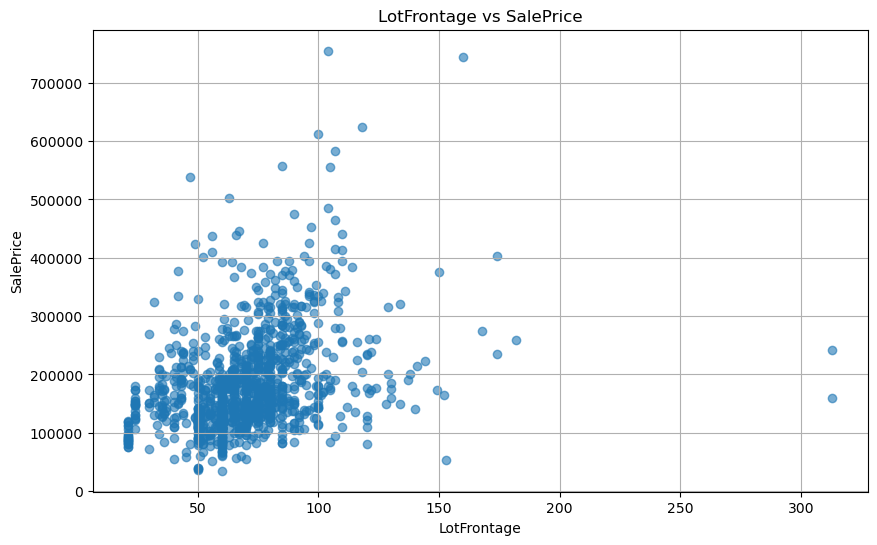

In [25]:
# Scatter Plot to determine relevance of LotFrontage in regards to SalePrice influence
plt.figure(figsize=(10, 6))
plt.scatter(train_data['LotFrontage'], train_data['SalePrice'], alpha=0.6)
plt.title('LotFrontage vs SalePrice')
plt.xlabel('LotFrontage')
plt.ylabel('SalePrice')
plt.grid(True)
plt.show()

In [27]:
# Calculate the averages of LotFrontage filled values vs Missing values in relation to SalePrice
missing_lot_frontage = train_data[train_data['LotFrontage'].isnull()]
filled_lot_frontage = train_data[train_data['LotFrontage'].notnull()]

# Averages relatively close to one another, likely not a large influence on the SalePrice
# Allows safe filling of missing values with the mean without creating too much influenced data
print("Average Sale Price for missing LotFrontage properties: ", missing_lot_frontage['SalePrice'].mean())
print("Average Sale price for filled LotFrontage properties: ", filled_lot_frontage['SalePrice'].mean())

Average Sale Price for missing LotFrontage properties:  181620.07335907337
Average Sale price for filled LotFrontage properties:  180770.48043297252


In [29]:
# Convert missing LotFrontage and MasVnrArea values with the average of their columns from train_data
replacement = {'LotFrontage': train_data['LotFrontage'].mean(), 'MasVnrArea': train_data['MasVnrArea'].mean()} 

# Apply replacement average to the two columns in both datasets
train_data.fillna(replacement, inplace=True)
test_data.fillna(replacement, inplace=True)

In [31]:
# Check other columns that might have large amounts of missing data
columns_to_check = ['Alley', 'PoolQC', 'Fence', 'MiscFeature']

# Print out what unique string values are in each col of train_data
for col in columns_to_check:
    print(f"String values in {col}:")
    print(train_data[col].unique())

# Same check for test_data
for col in columns_to_check:
    print(f"String values in {col}:")
    print(test_data[col].unique())

String values in Alley:
['NA' 'Grvl' 'Pave']
String values in PoolQC:
['NA' 'Ex' 'Fa' 'Gd']
String values in Fence:
['NA' 'MnPrv' 'GdWo' 'GdPrv' 'MnWw']
String values in MiscFeature:
['NA' 'Shed' 'Gar2' 'Othr' 'TenC']
String values in Alley:
['NA' 'Pave' 'Grvl']
String values in PoolQC:
['NA' 'Ex' 'Gd']
String values in Fence:
['MnPrv' 'NA' 'GdPrv' 'GdWo' 'MnWw']
String values in MiscFeature:
['NA' 'Gar2' 'Shed' 'Othr']


In [33]:
# Since these 4 columns are categorical and contain strings, we want to make sure that NA is interpreted as NaN 
# So that we can calculate the percentage of missing values
def convert_na_to_nan(dataframe, columns):
    for col in columns:

        print(f"Before replacement in {col}:")
        print(dataframe[col].unique())
        
        dataframe[col] = dataframe[col].replace('NA', np.nan) # Replaces all string instances of NA with NaN using numpy.nan

        print(f"After replacement in {col}:")
        print(dataframe[col].unique())

    return dataframe

# Run our datasets through our function to convert the 4 columns NA values to NaN
train_data = convert_na_to_nan(train_data, columns_to_check)
test_data = convert_na_to_nan(test_data, columns_to_check)

Before replacement in Alley:
['NA' 'Grvl' 'Pave']
After replacement in Alley:
[nan 'Grvl' 'Pave']
Before replacement in PoolQC:
['NA' 'Ex' 'Fa' 'Gd']
After replacement in PoolQC:
[nan 'Ex' 'Fa' 'Gd']
Before replacement in Fence:
['NA' 'MnPrv' 'GdWo' 'GdPrv' 'MnWw']
After replacement in Fence:
[nan 'MnPrv' 'GdWo' 'GdPrv' 'MnWw']
Before replacement in MiscFeature:
['NA' 'Shed' 'Gar2' 'Othr' 'TenC']
After replacement in MiscFeature:
[nan 'Shed' 'Gar2' 'Othr' 'TenC']
Before replacement in Alley:
['NA' 'Pave' 'Grvl']
After replacement in Alley:
[nan 'Pave' 'Grvl']
Before replacement in PoolQC:
['NA' 'Ex' 'Gd']
After replacement in PoolQC:
[nan 'Ex' 'Gd']
Before replacement in Fence:
['MnPrv' 'NA' 'GdPrv' 'GdWo' 'MnWw']
After replacement in Fence:
['MnPrv' nan 'GdPrv' 'GdWo' 'MnWw']
Before replacement in MiscFeature:
['NA' 'Gar2' 'Shed' 'Othr']
After replacement in MiscFeature:
[nan 'Gar2' 'Shed' 'Othr']


In [35]:
# Calculate the percentage of missing values for the 4 columns
missing_percentages = train_data[columns_to_check].isnull().sum() / len(train_data) * 100
print(missing_percentages)

Alley          93.767123
PoolQC         99.520548
Fence          80.753425
MiscFeature    96.301370
dtype: float64


In [37]:
# Specify columns to drop in datasets
dropped_columns = ['Alley', 'PoolQC', 'Fence', 'MiscFeature']

# Drop columns in datasets
train_data = train_data.drop(columns=dropped_columns, axis=1)
test_data = test_data.drop(columns=dropped_columns, axis=1)

In [39]:
# Check to make sure all numerical columns are fully numeric
numerical_columns = train_data.select_dtypes(include=['float64', 'int64']).columns

# Remove SalePrice from the numeric conversion
numerical_columns = numerical_columns[numerical_columns != 'SalePrice']

# Convert any outliers in the columns into numeric to ensure the fill missing values section works 
for col in numerical_columns:
    train_data[col] = pd.to_numeric(train_data[col], errors='coerce')
    test_data[col] = pd.to_numeric(test_data[col], errors='coerce')

In [41]:
# Fill remaining missing values

# Fill NaN values for columns with numerical values
for col in numerical_columns:
    train_data[col] = train_data[col].fillna(train_data[col].mean())
    test_data[col] = test_data[col].fillna(test_data[col].mean())

# Fill NaN values for categorical columns with the mode (most frequent value)
categorical_columns = train_data.select_dtypes(include=['object']).columns

for col in categorical_columns:
    mode_val = train_data[col].mode()[0] # Calculates the mode of the current column in the loop based off train_data

    # Fill the empty values with the mode for both train and test
    train_data[col] = train_data[col].fillna(mode_val)
    test_data[col] = test_data[col].fillna(mode_val)

In [43]:
# Set up X and y for training 
X_train = train_data.drop('SalePrice', axis=1)
y_train = train_data['SalePrice']

In [45]:
# Set up X_test with the test data
X_test = test_data

In [47]:
# Check that train and test columns are consistent with categorical columns
print("Train columns:", X_train.columns)
print("Test columns:", X_test.columns)

# Print any column categories that may be missing
missing_columns = set(X_train.columns) - set(X_test.columns)
print("Missing columns in X_test:", missing_columns)

Train columns: Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'Pave

In [49]:
# Apply encoding to categorical columns so they can be processed by Model
X_train_encoded = pd.get_dummies(X_train, columns=categorical_columns, drop_first=True)
X_test_encoded = pd.get_dummies(X_test, columns=categorical_columns, drop_first=True)

In [51]:
# Check to make sure both encoded datasets have the same columns
X_train_encoded, X_test_encoded = X_train_encoded.align(X_test_encoded, join='left', axis=1, fill_value=0)

In [53]:
# Check to make sure all of our columns are aligned between train encoded and test encoded
print(X_train_encoded.shape)
print(X_test_encoded.shape)

(1460, 345)
(1459, 345)


In [55]:
# Check to make sure all categorical columns were correctly encoded into booleans 
print(X_train_encoded.dtypes.value_counts())
print(X_test_encoded.dtypes.value_counts())

bool       309
int64       34
float64      2
Name: count, dtype: int64
bool       286
int64       49
float64     10
Name: count, dtype: int64


In [57]:
# Use log transform on SalePrice for training
y_train_log = np.log1p(y_train)  

In [59]:
# Initialize scaler
scaler = StandardScaler()

# Scale encoded training and testing data 
X_train_encoded_scaled = scaler.fit_transform(X_train_encoded)
X_test_encoded_scaled = scaler.transform(X_test_encoded)

In [61]:
# Initialize Random Forest Model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit model with transformed test data
rf_model.fit(X_train_encoded_scaled, y_train_log)

RandomForestRegressor(random_state=42)

In [62]:
# RANDOM FOREST PREDICTIONS
# Store predictions using transformed testing data
rf_y_pred_log = rf_model.predict(X_test_encoded_scaled)

# Inverse the log transformation
rf_y_pred = np.expm1(rf_y_pred_log)

In [63]:
# Create some polynomial Features to help with non-linear relationships
poly = PolynomialFeatures(degree=2) # Degree 2 = quadratic

# Fit and transform the train and test sets with the polynomial features
X_train_poly = poly.fit_transform(X_train_encoded_scaled)
X_test_poly = poly.transform(X_test_encoded_scaled)

In [66]:
# Initialize Linear Regression model
lr_model = LinearRegression()

# Fit model with transformed training data
lr_model.fit(X_train_poly, y_train_log)

LinearRegression()

In [68]:
# LINEAR REGRESSION PREDICTIONS
# Store prediction using transformed testing data
lr_y_pred_log = lr_model.predict(X_test_poly)

# Inverse the log transformation
lr_y_pred = np.expm1(lr_y_pred_log)

In [69]:
# Create random forest submission .csv file with the id and predicted SalePrice columns
rf_submission = pd.DataFrame({
    'Id': X_test_encoded['Id'],
    'SalePrice': rf_y_pred
})

# Create linear regression submission .csv file with the id and predicted SalePrice columns
lr_submission = pd.DataFrame({
    'Id': X_test_encoded['Id'],
    'SalePrice': lr_y_pred
})

rf_submission.to_csv('rf_submission.csv', index=False)
lr_submission.to_csv('lr_submission.csv', index=False)

In [70]:
# Print check to see some predicted SalePrice values to check accuracy

# View the first 10 rf predictions
print(f"First 10 sale prices of Random Forest: {rf_y_pred[:10]}")

# View the first 10 lr predictions
print(f"First 10 sale prices of Linear Regression: {lr_y_pred[:10]}")  

First 10 sale prices of Random Forest: [123263.42312601 154752.2867674  180078.76590761 182328.30410515
 194572.71318624 183094.42994746 161273.70127587 176237.43209537
 179796.00527144 121262.20947602]
First 10 sale prices of Linear Regression: [140033.32399997 170677.46688304 182040.80389568 179125.36312999
 193122.79682105 174590.9471102  154107.70717726 169170.22119893
 163677.88922442 163505.50897926]


In [71]:
# Max and min values for Random Forest predictions
print(f"Random Forest Predictions - Min: {rf_y_pred.min()}, Max: {rf_y_pred.max()}")

# Max and min values for Linear Regression predictions
print(f"Linear Regression Predictions - Min: {lr_y_pred.min()}, Max: {lr_y_pred.max()}")


Random Forest Predictions - Min: 54815.60524921055, Max: 524878.796017122
Linear Regression Predictions - Min: 33092.69024871221, Max: 1010044.2714236046


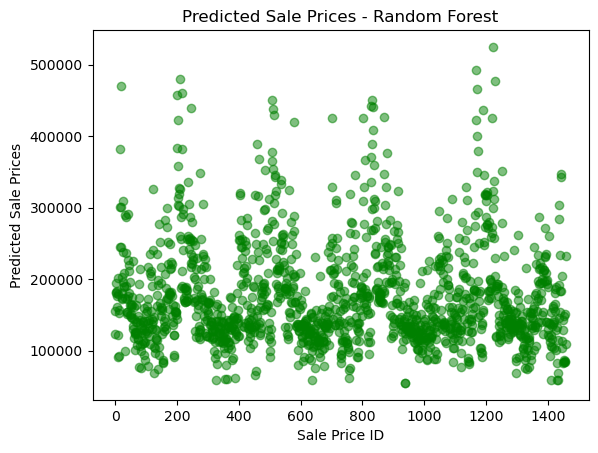

In [72]:
plt.scatter(range(len(rf_y_pred)), rf_y_pred, alpha=0.5, color='green')
plt.title('Predicted Sale Prices - Random Forest')
plt.xlabel('Sale Price ID')
plt.ylabel('Predicted Sale Prices')
plt.show()

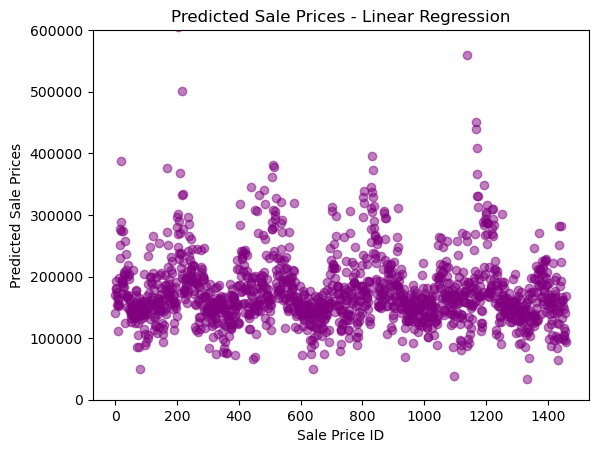

In [79]:
plt.scatter(range(len(lr_y_pred)), lr_y_pred, alpha=0.5, color='purple')
plt.title('Predicted Sale Prices - Linear Regression')
plt.xlabel('Sale Price ID')
plt.ylabel('Predicted Sale Prices')
plt.ylim(0, 600000) # Limited y-axis scaling to match random forest graph's range
plt.show()